In [2]:
#basic data and image manipuation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#CNN model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2D, Flatten

#model management
import pickle


2023-03-26 13:31:36.775438: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
filename = '../models/digit_model.sav'
model = pickle.load(open(filename, 'rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-23 18:39:06         2982
metadata.json                                  2023-03-23 18:39:06           64
variables.h5                                   2023-03-23 18:39:06      9527464
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......conv2d
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......flatten
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
........

2023-03-26 13:31:39.388650: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
df_test = pd.read_csv("../data/mnist_test.csv")
df_test = df_test.drop('label', axis = 1)
df_test = df_test.values.reshape(-1,28,28,1)
df_test = df_test/255.0

In [5]:
type(df_test[0])

numpy.ndarray

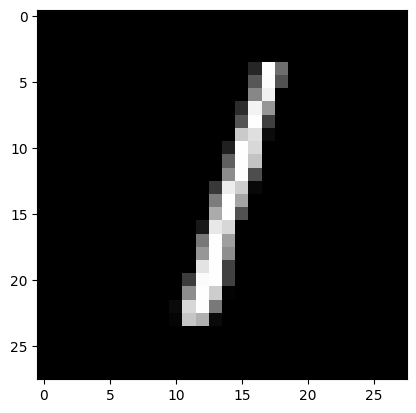

In [19]:
plt.imshow(df_test[2], cmap="gray")

In [20]:
prediction = model.predict(np.expand_dims(df_test[2], axis=0))
prediction

1/1 [==============================] - 0s 23ms/step


array([[1.4501771e-08, 9.9996281e-01, 1.4842211e-05, 1.1782972e-09,
        1.3599653e-05, 1.3885171e-08, 6.0957232e-06, 2.1291908e-06,
        5.2264414e-07, 1.2152790e-08]], dtype=float32)

In [21]:
def predict_arr_to_int(array):
    digit = "unknown"
    for i in range(10):
        if array[0][i] > 0.9:
            digit = i
    return str(digit)

In [22]:
predict_arr_to_int(prediction)

'1'